# Calculus in ML Demonstration In Python
##### SymPy (symbolic) + NumPy (numerical)

This notebook demonstrates:
- Symbolic derivatives using **SymPy**
- Symbolic gradient of a loss function
- Numerical derivatives using **NumPy** (central difference)
- Numerical gradient of the SSE loss and visualization


### Import Libraries

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Part A — Symbolic derivatives (SymPy)

Functions:
1. $y_1(x) = x^3$  
2. $y_2(x) = x^3 + x^2 + 4$

We compute first and second derivatives and evaluate them at $x=2$.

In [8]:
# Define symbol
x = sp.Symbol('x')

# Function 1
y1 = x**3
dy1 = sp.diff(y1, x)
d2y1 = sp.diff(y1, x, 2)

print('Function 1: y = x^3')
print('  First derivative (symbolic):', dy1)
print('  Second derivative (symbolic):', d2y1)
print('  First derivative at x=2:', dy1.subs(x, 2))
print('  Second derivative at x=2:', d2y1.subs(x, 2))


Function 1: y = x^3
  First derivative (symbolic): 3*x**2
  Second derivative (symbolic): 6*x
  First derivative at x=2: 12
  Second derivative at x=2: 12


In [9]:
# Function 2
y2 = x**3 + x**2 + 4
dy2 = sp.diff(y2, x)
d2y2 = sp.diff(y2, x, 2)

print('\nFunction 2: y = x^3 + x^2 + 4')
print('  First derivative (symbolic):', dy2)
print('  Second derivative (symbolic):', d2y2)
print('  First derivative at x=2:', dy2.subs(x, 2))
print('  Second derivative at x=2:', d2y2.subs(x, 2))



Function 2: y = x^3 + x^2 + 4
  First derivative (symbolic): 3*x**2 + 2*x
  Second derivative (symbolic): 2*(3*x + 1)
  First derivative at x=2: 16
  Second derivative at x=2: 14


### Part B — Numerical derivatives (NumPy)

We implement central difference formulas and compare with symbolic results where appropriate.

In [10]:
def numeric_derivative(f, x, h=1e-5):
    """Central difference approximation of derivative"""
    return (f(x + h) - f(x - h)) / (2*h)

f = lambda t: t**3
num_d_f_at_2 = numeric_derivative(f, 2.0)

print('Numerical derivative of f(x)=x^3 at x=2 (approx):', num_d_f_at_2)
print('Symbolic derivative value for comparison:', dy1.subs(x, 2))


Numerical derivative of f(x)=x^3 at x=2 (approx): 12.00000000021184
Symbolic derivative value for comparison: 12


### Part C — Numerical gradient of the SSE loss and evaluation

Here, we consider loss function in simple linear regression model. We compute numerical partial derivatives of the loss w.r.t. b0 and b1 using finite differences, evaluate gradients at (b0=0,b1=1), compute actual loss change when b0 changes from 0 to 0.5, and plot Loss vs b0 (b1 fixed).

Numerical gradients at (b0=0, b1=1):
  dL/db0 ≈ -10.600000000016152
  dL/db1 ≈ -21.40000000001585


If the gradient is negative (dL/db < 0), increasing the parameter decreases the loss because the loss slopes downward in the positive direction.

Gradient descent always moves parameters in the opposite direction of the gradient, which is why it reduces the loss.

When the gradient is negative, moving opposite to it means increasing the parameter, so b0 and b1 both get larger.



Let us fix the value of b1 to 1 and increase b0 from 0 to 0.5, and then evaluate the actual loss.

Loss at b0=0.0, b1=1.0 : 5.669999999999998
Loss at b0=0.5, b1=1.0 : 1.6199999999999994
Actual change in loss (ΔL): -4.049999999999999

Linear (first-order) approx ΔL ≈ dL/db0 * Δb0 = -5.300000000008076


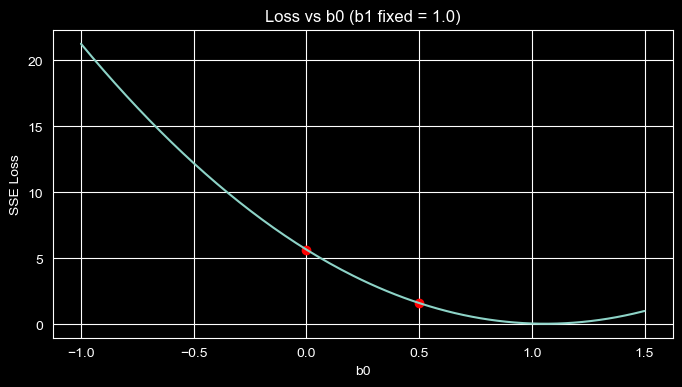



The red dots represent the loss values, and we can clearly see that the loss decreases as we increase, confirming what the negative gradient indicated


In [11]:
Xi = [0, 1, 2, 3, 4]
Yi = [1, 2.2, 2.9, 4.1, 5.1]


X = np.array(Xi)
Y = np.array(Yi)

def loss_np(b0, b1):
    return np.sum((Y - (b0 + b1*X))**2)

def dL_db0_num(b0, b1, h=1e-5):
    return (loss_np(b0 + h, b1) - loss_np(b0 - h, b1)) / (2*h)

def dL_db1_num(b0, b1, h=1e-5):
    return (loss_np(b0, b1 + h) - loss_np(b0, b1 - h)) / (2*h)

# Evaluate at (b0=0, b1=1)
b0_a, b1_fixed = 0.0, 1.0
d0 = dL_db0_num(b0_a, b1_fixed)
d1 = dL_db1_num(b0_a, b1_fixed)

print('Numerical gradients at (b0=0, b1=1):')
print('  dL/db0 ≈', d0)
print('  dL/db1 ≈', d1)

print("\n\nIf the gradient is negative (dL/db < 0), increasing the parameter decreases the loss because the loss slopes downward in the positive direction.\n\n"
      "Gradient descent always moves parameters in the opposite direction of the gradient, which is why it reduces the loss.\n\n"
      "When the gradient is negative, moving opposite to it means increasing the parameter, so b0 and b1 both get larger.")


print("\n\n ================================================================================================================\n\n"
"Let us fix the value of b1 to 1 and increase b0 from 0 to 0.5, and then evaluate the actual loss.")

# Loss change when b0 moves 0 -> 0.5
L0 = loss_np(0.0, b1_fixed)
L05 = loss_np(0.5, b1_fixed)
deltaL = L05 - L0
print('\nLoss at b0=0.0, b1=1.0 :', L0)
print('Loss at b0=0.5, b1=1.0 :', L05)
print('Actual change in loss (ΔL):', deltaL)

# First-order linear approximation using gradient
delta_b0 = 0.5 - 0.0
linear_approx = d0 * delta_b0
print('\nLinear (first-order) approx ΔL ≈ dL/db0 * Δb0 =', linear_approx)

# Plot Loss vs b0 with b1 fixed
b0_vals = np.linspace(-1.0, 1.5, 200)
loss_vals = [loss_np(b0, b1_fixed) for b0 in b0_vals]

plt.figure(figsize=(8,4))
plt.plot(b0_vals, loss_vals)
plt.scatter([0.0, 0.5], [L0, L05], color='red')
plt.title('Loss vs b0 (b1 fixed = 1.0)')
plt.xlabel('b0')
plt.ylabel('SSE Loss')
plt.grid(True)
plt.show()


print ("\n\nThe red dots represent the loss values, and we can clearly see that the loss decreases as we increase, confirming what the negative gradient indicated")

### Short interpretation

- The symbolic derivatives are exact and match numerical approximations closely for small h.
- The gradient gives a first-order (linear) approximation of how loss changes for small parameter steps.
- The plot shows loss as a convex function in b0 (with b1 fixed) and highlights the two evaluated points.

In [32]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([2.1, 4.2, 5.8, 8.1, 10.3, 11.9, 14.2, 16.1, 17.8, 20.2])

# 1. Proceeding with vector notation
VX = np.column_stack((np.ones_like(X), X))

# METHOD: normal equation (very expensive to calculate because of inverse)
optimal_beta = np.linalg.inv(VX.T @ VX) @ (VX.T @ Y)
print("Optimal Beta: ", optimal_beta)

# METHOD: gradient descent
# loss function (SSE Gradient): dL/dbeta = -2 * X.T @ residuals (residuals = Y - VX @ beta)
def loss_function(b):
    predictions = VX @ b
    r = Y - predictions
    g = -2 * VX.T @ r
    return g, r

loss_history = []
step = 1e-4
epochs = 50000
beta = np.array([.0, .0])
previous_loss = 1e+5
tolerance = 1e-9

for i in range(epochs):
    gradient, residuals = loss_function(beta)
    beta = beta - (step * gradient)
    loss = np.sum(residuals ** 2)
    loss_history.append(loss)
    if previous_loss - loss < tolerance:
        break
    previous_loss = loss

print("Beta:", beta)
print("Diff: ", optimal_beta - beta)
print("Final Loss:", loss_history[-1])

Optimal Beta:  [0.08666667 1.9969697 ]
Beta: [0.08741139 1.99686273]
Diff:  [-0.00074472  0.00010697]
Final Loss: 0.28024361381276625
